<a href="https://colab.research.google.com/github/HecVelaz/Codigos-de-Algoritmos--Ejemplos-variados/blob/main/TP6/HectorVelazquez_Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install networkx #instalacion para el uso de la biblioteca networkx

In [107]:
import networkx as nx
import matplotlib.pyplot as plt #utilizado para graficos

In [108]:
class Ciudad:#creando la clase Ciudad
  def __init__(self,clave):
    self.clave = clave #identificacion de la ciudad
    self.vecinos= [] #lista de vecinos cercanos de la ciudad

In [109]:
class Grafo:#creamos la clase grafo
  def __init__(self):
    self.vertices = [] #variable de instancia vertices , lista vacia que tendra nodos del grafo
  def agregar(self,n): #metodo de la clase grafo , toma el argumento n
    self.vertices.append(n) #se agrega el vertice a la lista vertices del grafo
  def agregarArista(self, a, b, distancia):# Metodo utilizado para para agregar una arista al grafo,la distancia es la long de la arista. a y b vertices
        a.vecinos.append((b, distancia))# se agrega el vertice b a la lista de vecinos del vertice a y la distancia entre ellos
        b.vecinos.append((a, distancia))
  def dibujarGrafo(self):#Metodo para graficar el grafo
        G = nx.Graph()#objeto grafo
        for v in self.vertices:#iteracion sobre cada vertice de vertices
            for vecino, dist in v.vecinos: #iteracion sobre cada vecino del vertice v actual (cada vecino es una tupla (vecino, distancia))
                G.add_edge(v.clave, vecino.clave, weight=dist)#se agrega una lista a G(grafo) entre vertice v y su vecino , el peso(weigth= distancia entre vecinos)
        pos = nx.spring_layout(G)#se usa para organizar los nodos para la visualizacion
        labels = {v.clave: v.clave for v in self.vertices}#diccionario para nodos del grafo, la clave y el valor son el identificador
        #nodsize es tamaño del nodo , font size e tamaño de fuente , node_color es color del nodo )
        nx.draw(G, pos, with_labels=True, labels=labels, node_size=700, font_size=15, node_color='lightblue', font_color='black')
        nx.draw_networkx_edge_labels(G, pos, font_color='red', font_size=12)#etiquetas a la aristas del grafo
        plt.title("Grafo de Ciudades")#titulo principal
        plt.show()#mostrar el grafico
  def longitudMaximaCable(self):#Algoritmo DFS(Depth-First Search) Busqueda en profundidad
        #metodo que realiza la busqueda para la long maxima
        #dfs(vertice ,vertice anterior ,distancia actual desde el vértice inicial hasta el vértice actual, conjunto de vértices visitados en el camino actual )
        def dfs(v, padre, distancia_actual, visitados):
            nonlocal max_distancia
            visitados.add(v)#añade el vertice "v" a visitados
            for vecino, dist in v.vecinos:#iteracion sobre cada vecino del vertice actual v
                if vecino != padre and vecino not in visitados:#si vecino es distinto de vecino anterior y si no ha sido visitado
                    max_distancia = max(max_distancia, distancia_actual + dist) #actualiza la maxdistancia con la funcion max
                    dfs(vecino, v, distancia_actual + dist, visitados)#se llama recursivamente a dfs
            visitados.remove(v)#Elimina el vértice v del conjunto de vértices visitados para que pueda ser visitado en otros caminos.

        max_distancia = 0#inicializar max_distancia
        # Iniciar DFS desde cualquier vértice
        for v in self.vertices:
            dfs(v, None, 0, set())#Llama a dfs con el vértice actual v, ningún padre inicial (None), una distancia actual de 0 y un conjunto de vértices visitados vacío.
        return max_distancia




**Introducir por teclado el grafo de entrada**

In [110]:
print('Entrada')
n = int(input())
grafo = Grafo()# Se crea una instancia de la clase grafo

for _ in range(n - 1):
    a, b, distancia = map(int, input().split())#se lee a b vertices y distancia entre vertices a y b
    ciudad_a = next((x for x in grafo.vertices if x.clave == a), None)#Busca si el vértice a ya está presente en el grafo. Si no lo está, devuelve None.
    ciudad_b = next((x for x in grafo.vertices if x.clave == b), None)#igual
    if not ciudad_a:#si a no esta
        ciudad_a = Ciudad(a)#Si el vértice a no está presente en el grafo, crea un nuevo objeto Ciudad con el identificador a.
        grafo.agregar(ciudad_a)# se agrega el vertice a al grafo
    if not ciudad_b:
        ciudad_b = Ciudad(b)
        grafo.agregar(ciudad_b)
    grafo.agregarArista(ciudad_a, ciudad_b, distancia)#Agrega la arista entre los vértices a y b con la distancia especificada al grafo.

# Calcular y mostrar la longitud máxima de cable
print('Salida:\n')
print(grafo.longitudMaximaCable())

Entrada
6
1 2 3 
2 3 4 
2 6 2 
6 4 6 
6 5 5 
Salida:

12


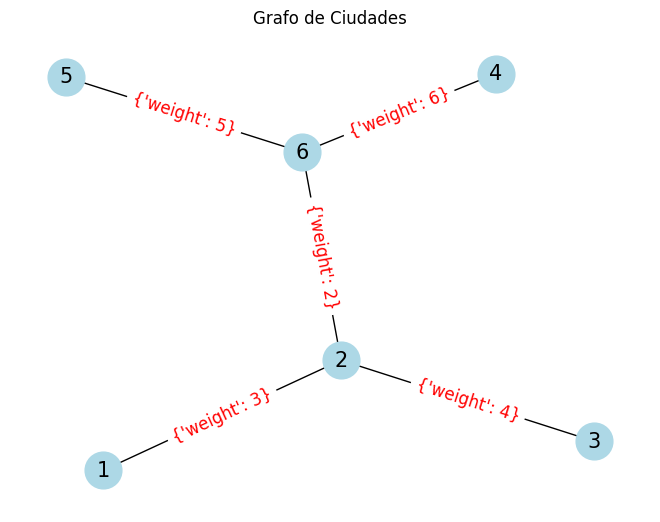

In [111]:
ciudad1 = Ciudad(1)
ciudad2 = Ciudad(2)
ciudad3 = Ciudad(3)
ciudad4 = Ciudad(4)
ciudad5 = Ciudad(5)
ciudad6 = Ciudad(6)

grafo.agregar(ciudad1)
grafo.agregar(ciudad2)
grafo.agregar(ciudad3)
grafo.agregar(ciudad4)
grafo.agregar(ciudad5)
grafo.agregar(ciudad6)

grafo.agregarArista(ciudad1, ciudad2, 3)
grafo.agregarArista(ciudad2, ciudad3, 4)
grafo.agregarArista(ciudad2, ciudad6, 2)
grafo.agregarArista(ciudad6, ciudad4, 6)
grafo.agregarArista(ciudad6, ciudad5, 5)

# Dibujar el grafo
grafo.dibujarGrafo()


**Sin introducir por teclado la entrada**



In [112]:
entrada = [
    (1, 2, 3),
    (2, 3, 4),
    (2, 6, 2),
    (6, 4, 6),
    (6, 5, 5)
]

grafo = Grafo()

for a, b, distancia in entrada:
    ciudad_a = next((x for x in grafo.vertices if x.clave == a), None)
    ciudad_b = next((x for x in grafo.vertices if x.clave == b), None)
    if not ciudad_a:
        ciudad_a = Ciudad(a)
        grafo.agregar(ciudad_a)
    if not ciudad_b:
        ciudad_b = Ciudad(b)
        grafo.agregar(ciudad_b)
    grafo.agregarArista(ciudad_a, ciudad_b, distancia)
print('Salida:\n')
print(grafo.longitudMaximaCable())

Salida:

12


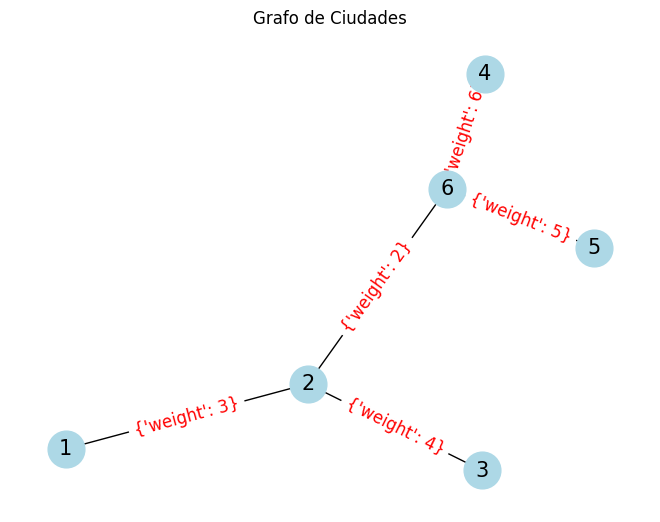

In [113]:
ciudad1 = Ciudad(1)
ciudad2 = Ciudad(2)
ciudad3 = Ciudad(3)
ciudad4 = Ciudad(4)
ciudad5 = Ciudad(5)
ciudad6 = Ciudad(6)

grafo.agregar(ciudad1)
grafo.agregar(ciudad2)
grafo.agregar(ciudad3)
grafo.agregar(ciudad4)
grafo.agregar(ciudad5)
grafo.agregar(ciudad6)

grafo.agregarArista(ciudad1, ciudad2, 3)
grafo.agregarArista(ciudad2, ciudad3, 4)
grafo.agregarArista(ciudad2, ciudad6, 2)
grafo.agregarArista(ciudad6, ciudad4, 6)
grafo.agregarArista(ciudad6, ciudad5, 5)

# Dibujar el grafo
grafo.dibujarGrafo()